In [12]:
%%capture --no-stderr
%pip install --quiet -U langgraph langchain_google_genai

In [13]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GOOGLE_API_KEY")

In [14]:
_set_env("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "langchain-academy"

In [15]:
from pprint import pprint

from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(f"So you said, you were researching ocean mamals", name="bot")]
messages.append(HumanMessage(f"Yes, I know about whales, But what other should I learn about", name="M"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: bot

So you said, you were researching ocean mamals
================================ Human Message =================================
Name: M

Yes, I know about whales, But what other should I learn about


In [16]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.0) 
llm.invoke(messages)

AIMessage(content='Okay, great! Whales are a good start. To broaden your knowledge of ocean mammals, here\'s a breakdown of other fascinating groups you should learn about, along with some specific examples:\n\n**1. Dolphins and Porpoises (Cetaceans - Odontocetes):**\n\n*   **Why Learn About Them:** Closely related to whales, but generally smaller and often more social. They exhibit complex communication and intelligence.\n*   **Key Differences:** Dolphins typically have a streamlined body, a prominent beak (rostrum), and conical teeth. Porpoises tend to be smaller, have a blunt snout, and spade-shaped teeth.\n*   **Examples:**\n    *   **Bottlenose Dolphin:** The most well-known dolphin, often seen in aquariums and used in research.\n    *   **Spinner Dolphin:** Known for their acrobatic leaps and spins out of the water.\n    *   **Orca (Killer Whale):** Technically a dolphin, the largest member of the dolphin family.\n    *   **Harbor Porpoise:** A small, shy porpoise found in coasta

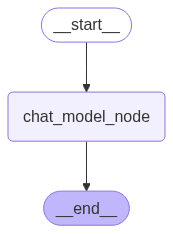

In [21]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState

    
def chat_model_node(state: MessagesState):
    print("---chat_model_node---")
    return {"messages": llm.invoke(state["messages"])}
 

builder = StateGraph(MessagesState)

builder.add_node("chat_model_node", chat_model_node) 

builder.add_edge(START, "chat_model_node") 
builder.add_edge("chat_model_node", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [22]:
output = graph.invoke({"messages": messages})

for m in output["messages"]:
    m.pretty_print()

---chat_model_node---
================================== Ai Message ==================================
Name: bot

So you said, you were researching ocean mamals
================================ Human Message =================================
Name: M

Yes, I know about whales, But what other should I learn about
================================== Ai Message ==================================

Okay, great! Whales are a good start. To broaden your knowledge of ocean mammals, here's a breakdown of other fascinating groups you should learn about, along with some specific examples:

**1. Dolphins and Porpoises (Cetaceans - Odontocetes):**

*   **Why Learn About Them:** Closely related to whales, but generally smaller and often more social. They exhibit complex communication and intelligence.
*   **Key Differences:** Dolphins typically have a streamlined body, a prominent beak (rostrum), and conical teeth. Porpoises tend to be smaller, have a blunt snout, and spade-shaped teeth.
*   **Example